<a href="https://colab.research.google.com/github/zum-m/jouhougakugairon/blob/quantium/%E7%9F%A5%E8%AD%98%E5%B7%A5%E5%AD%A6%E6%BC%94%E7%BF%92%E7%AC%AC1%E5%9B%9E_2111142001miura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.Qiskitによる量子回路の作成**


##**1.1 演習のための準備**
量子コンピュータの世界にようこそ。  
当演習ではIBMが提供する「Qiskit」というPython言語のライブラリーを使用します。  
量子コンピューティングは量子ビットに対する一連の演算により構成され、  
そのモデルは「量子回路」と呼ばれています。  
Qiskitは量子回路を作成し、量子コンピューティングをシミュレーションするためのツールです。  
さらにQiskitを通じてIBMが開発したプロトタイプの量子コンピュータにアクセスして、量子回路を実行させることも可能です。

それでは以下のコードを実行し、qiskitをインストールしましょう。

In [ ]:
pip install qiskit==0.39.4

さらに以下のコードを実行して、Qiskitによる学習を支援するライブラリーqiskit-textbookと量子回路を描画するためのライブラリーpylatexencもインストールします。

In [ ]:
pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /tmp/pip-req-build-h4nncr11
  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/qiskit-textbook.git /tmp/pip-req-build-h4nncr11
  Resolved https://github.com/qiskit-community/qiskit-textbook.git to commit 0ae905083ec3872d7ddc6bb4001d5468f476d93f
  Preparing metadata (setup.py) ... done


In [ ]:
pip install pylatexenc

演習で使用するパッケージをqiskitライブラリーからimportします。  
以下のコードを実行しましょう。  


In [ ]:
#QuntrumCircuitは量子回路を可視化するためのパッケージ
#assemble、Aerは量子回路シミュレーションのためのパッケージ
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram


##***1.2 量子回路を作成してみよう***

量子コンピューティングのモデル「量子回路」は  
大きく分けて３つのステージで構成されます。  
* Stage1:エンコード（入力情報を量子ビット情報に符号化）  
* Stage2:オペレーション（量子ビットに対する一連の操作、つまりコンピューティングの核）
* Stage3:出力の抽出（量子ビットの状態を測定し、結果を出力）  



### **出力の抽出をおこなう回路**
ここではまず、最後のステージ「出力の抽出」をおこなう量子回路を作成します。  
4つの量子ビットと2つの出力を持つ回路を想定します。
以下のコードを実行しましょう。

```
n_q = 4 #量子ビット数の指定
n_b = 2 #出力ビット数の指定
qc_output = QuantumCircuit(n_q,n_b) #コードQuantumCircuitにより作成された量子回路
qc_output.draw(output='mpl')#量子回路の表示

```

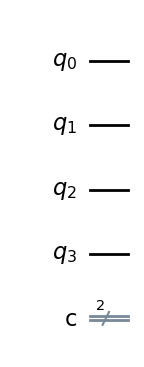

In [ ]:
n_q = 4 #量子ビット数の指定
n_b = 2 #出力ビット数の指定
qc_output = QuantumCircuit(n_q,n_b) #コードQuantumCircuitにより作成された量子回路
qc_output.draw(output='mpl')#量子回路の表示

この時点で、量子ビットの情報は抽出されていません。  
抽出をおこなうには「測定(measurement)」と呼ばれる操作が必要です。    
測定により量子ビットから0または1の情報が確率的に抽出されます。  
その確率は測定される量子ビットの状態で決まります。  
測定結果は出力ビットに書き込まれます。  
今回は量子ビット数を4(n_q=4),出力ビット数を2(n_b=2)としています。  
次のコードは、3番目と4番目の量子ビット$\ q_2,\ q_3\ $に「測定」を適用します。  
コマンドqc.measure(j,j）は量子ビットjに対する測定結果を出力ビットjに書き込むよう指示しています。

```
qc_output.measure(2,0)#測定の適用
qc_output.measure(3,1)
```

```
qc_output.draw('mpl')#量子回路の表示
```

In [ ]:
qc_output.measure(2,0)
qc_output.measure(3,1)

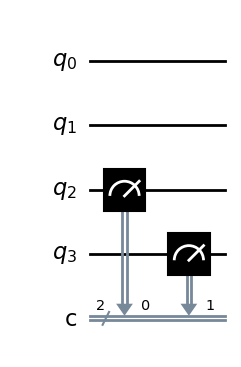

In [ ]:
qc_output.draw('mpl')

Qiskitは量子ビットの初期状態を「0」に設定しています。  
ですので、量子ビット$\ q_2,\ q_3\ $を「測定」すれば、
確率１で「0」が抽出されるはずです。  
このことを量子回路をシミュレーションすることで確かめてみましょう。




ーーー



以下のコードによりシミュレータを作成します。

```
sim = Aer.get_backend('aer_simulator')  # シミュレータの作成
```


In [ ]:
sim = Aer.get_backend('aer_simulator')

以下のコードによりシミュレータのジョブ「qobj」を設定します。ジョブの内容は量子回路(qc_output)です。

```
qobj = assemble(qc_output)  # シミュレータのジョブを設定
```

In [ ]:
qobj = assemble(qc_output)

以下のコードによりシミュレーションを実行し、結果をオブジェクト「result」に格納します。

```
result = sim.run(qobj).result()  # シミュレーションを実行した結果を得る
```

In [ ]:
result = sim.run(qobj).result()

シミュレータは量子回路を何回も実行するように設定されています。  
一般に、量子回路から得る出力結果は確率的に変わる確率変数であるためです。  
オブジェクト「result」には出力の頻度データ「counts」が格納されています。  
以下のコードによりresultにあるcountsデータを取り出します。

```
counts = result.get_counts()#出力の頻度データ(counts)の取り出し
print(counts)#countsの表示
```

In [ ]:
counts = result.get_counts()#出力の頻度データ(counts)の取り出し
print(counts)#countsの表示

{'00': 1024}


countsデータのヒストグラムを以下のコードにより描画しましょう。

```
plot_histogram(counts)# ヒストグラムの描画
```

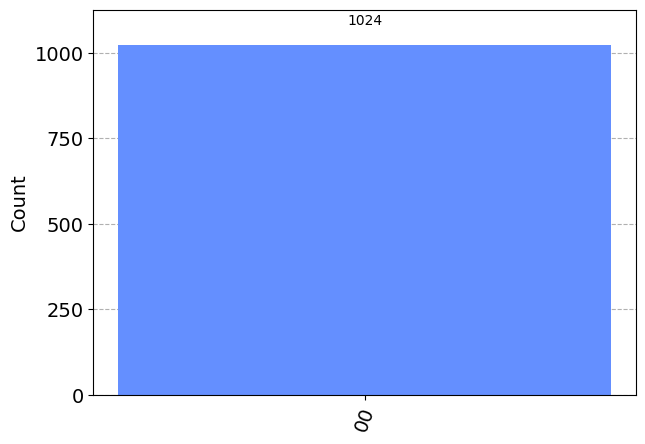

In [ ]:
plot_histogram(counts)

予想通りの結果ですね。

### **エンコードをおこなう回路**
次に量子回路の最初のステージ「エンコード」をおこなう回路を作成します。  
ここでは4つの量子ビット$\ q_0,\ q_1,\ q_2,\ q_3\ $に対し、
これらの初期状態「0000」を「1100」にエンコードする操作を問題としましょう。  
この操作は量子ビット情報に対し「0」を「1」に、または「1」を「0」に反転させる演算により実現されます。  
量子回路モデルにおいては、反転の演算は「NOTゲート」と呼ばれます。  
まず、4量子ビットからなる回路(qc_encode)を設定します。

```
qc_encode1100=QuantumCircuit(4)#ここでは4量子ビットからなる回路を設定します
qc_encode1100.draw('mpl')#量子回路の表示
```

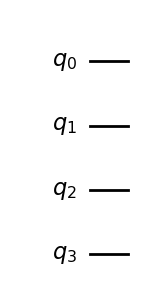

In [ ]:
qc_encode1100=QuantumCircuit(4)#ここでは4量子ビットからなる回路を設定します
qc_encode1100.draw('mpl')#量子回路の表示

さらに量子ビット$\ q_0,\ q_1\ $にNOTゲートを適用します。

```
qc_encode1100.x(0)#NOTゲートの適用
qc_encode1100.x(1)
qc_encode1100.draw('mpl')#量子回路の表示
```

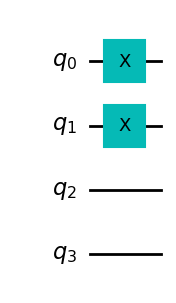

In [ ]:
qc_encode1100.x(0)#NOTゲートの適用
qc_encode1100.x(1)
qc_encode1100.draw('mpl')#量子回路の表示

これが初期状態「0000」を「1100」にエンコードする量子回路です。  
同様にして「0000」を「0000」にエンコードする量子回路(qc_encode0000)  
「0000」を「0100」にエンコードする量子回路(qc_encode0100) 、   
「0000」を「1000」にエンコードする量子回路(qc_encode1000)  
を作成しましょう.

```
qc_encode0000=QuantumCircuit(4)
qc_encode0100=QuantumCircuit(4)
qc_encode0100.x(1)
qc_encode1000=QuantumCircuit(4)
qc_encode1000.x(0)
```

In [ ]:
qc_encode0000=QuantumCircuit(4)
qc_encode0100=QuantumCircuit(4)
qc_encode0100.x(1)
qc_encode1000=QuantumCircuit(4)
qc_encode1000.x(0)

```
qc_encode0000.draw('mpl')
```

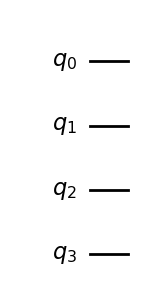

In [ ]:
qc_encode0000.draw('mpl')

```
qc_encode0100.draw('mpl')
```

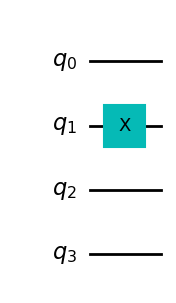

In [ ]:
qc_encode0100.draw('mpl')

```
qc_encode1000.draw('mpl')
```

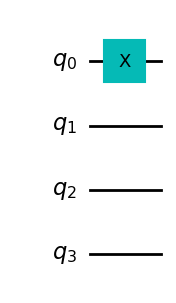

In [ ]:
qc_encode1000.draw('mpl')

In [ ]:
# qc_encode

---
---



### **オペレーション「足し算」をおこなう回路**
ここまでで２つの量子回路「qc_encode」と「qc_output」を作成しました。  
これらの間に「オペレーション」をおこなう回路が入ります。  
ここでは「足し算」、    
$0+0=0,\ 0+1=1,\ 1+0=1,\ 1+1=2$  
を実行する回路「qc_operation」を作成します。  
この回路は4つの量子ビットを必要とします。
```
qc_operation=QuantumCircuit(4)
qc_operation.draw('mpl')
```

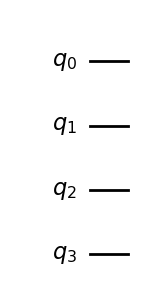

In [ ]:
qc_operation=QuantumCircuit(4)
qc_operation.draw('mpl')

量子ビット$\ q_0,\ q_1\ $の状態が計算式の左辺、  
量子ビット$\ q_2,\ q_3\ $の状態が右辺の2進法の表現に対応すると考えます。  
つまり量子ビット間に
* $(q_0,q_1)=(0,0)$ ならば $(q_2,q_3)=(0,0)$
* $(q_0,q_1)=(0,1)$ ならば $(q_2,q_3)=(1,0)$
* $(q_0,q_1)=(1,0)$ ならば $(q_2,q_3)=(1,0)$
* $(q_0,q_1)=(1,1)$ ならば $(q_2,q_3)=(0,1)$  

という関係、  
「$(q_0,q_1)$の状態が、$(q_2,q_3)$への反転操作を制御している」関係  
を作らなくてはなりません。    
まずは量子ビット$q_2$への反転操作について考えましょう。  
* 量子ビット$q_0$が1であるときに$q_2$は反転操作を受けます。  
* 量子ビット$q_1$が1であるときも$q_2$は反転操作を受けます。  
（ $q_0,q_1$が共に1であるときは量子ビット$q_2$は2回の反転を受けて初期の0に戻ります。）

量子回路においては、こうした操作はふたつの「制御NOTゲート(CNOTゲート)（コントロールnotゲート)」により表現されます。  
$q_0$を制御、$q_2$を標的とするCNOTゲートと $q_1$を制御、$q_2$を標的とするCNOTゲートを  
以下のコードにより適用しましょう。
```
qc_operation.cx(0,2)#CNOTゲートの適用
qc_operation.cx(1,2)
qc_operation.draw('mpl')
```




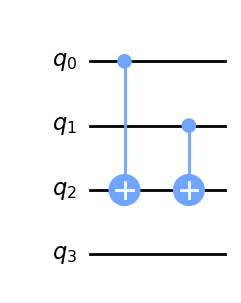

In [ ]:
qc_operation.cx(0,2)#CNOTゲートの適用
qc_operation.cx(1,2)
qc_operation.draw('mpl')

次に量子ビット$q3$への反転操作を考えましょう。  
$q_3$は$q_0,q_1$が共に1のときのみ反転を受けます。  
この操作は二つの制御による反転を意味するCCNOTゲート(Toffoliゲート)  
により実行されます。  
$q_0,q_1$を制御、$q_3$を標的とするCCNOTゲートを以下のコードにより適用します。
```
qc_operation.ccx(0,1,3)#CCNOTゲートの適用
qc_operation.draw('mpl')
```


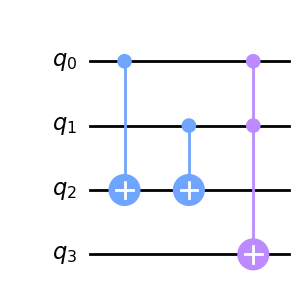

In [ ]:
qc_operation.ccx(0,1,3)#CCNOTゲートの適用
qc_operation.draw('mpl')

これで0+0,0+1,1+0,1+1をおこなうオペレーション回路が完成しました。

##***1.3 量子回路のシミュレーション***

### **1+1計算のシミュレーション**
エンコードをおこなう回路(qc_encode1100)と足し算のオペレーションをおこなう回路(qc_operation)、  
そして出力の抽出をおこなう回路(qc_output)を結合した回路(qc)を作成します。
```
qc=qc_encode1100+qc_operation+qc_output
qc.draw('mpl')
```

<ipython-input-142-1e14cbced633>:1: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  qc=qc_encode1100+qc_operation+qc_output


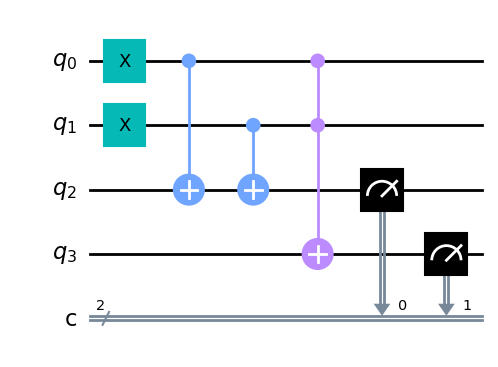

In [ ]:
qc=qc_encode1100+qc_operation+qc_output
qc.draw('mpl')

この回路は1+1の計算をおこなう回路です。
よって出力ビット情報は確率１で01となるはずです。  
シミュレーションをおこなってみましょう。
```
qobj = assemble(qc)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)
```

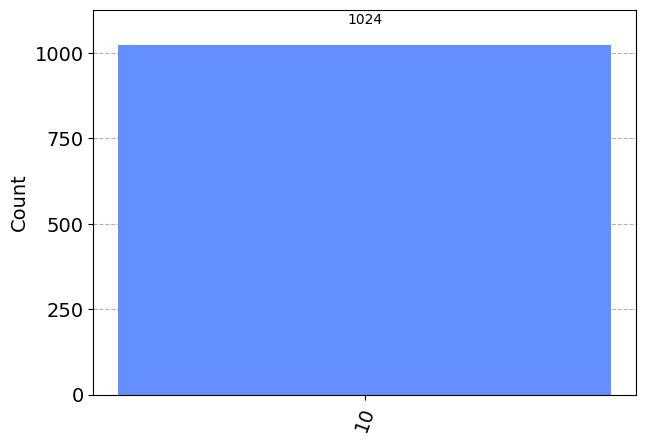

In [ ]:
qobj = assemble(qc)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

同様にエンコード回路をqc_encode0000,qc_encode0100,qc_encode1000に置き換えれば  
回路は0+0,0+1,1+0を実行することになります。

### **量子並列計算**
量子ビットは古典ビットのような「0もしくは1」の状態ではなく、  
「量子重ね合わせ(qunatum superposition)」と呼ばれる特殊な状態を取り得ます。  
それは測定をおこなうと確率的に0もしくは1に遷移するような、潜在性を有した  
ひとつの状態と解釈され、数学的にはベクトルの形式で表現されます。  
0の状態をベクトル$|0\rangle= \left(\begin{array}{c}1\\ 0\end{array}\right)$、1の状態をベクトル$|1\rangle=\left(\begin{array}{c}0\\ 1\end{array}\right)$とおけば、  
量子ビットの状態は  
$$\frac{1}{\sqrt2}|0⟩+\frac{1}{\sqrt2}|1⟩=\frac{1}{\sqrt 2} \left(\begin{array}{c}1\\ 0\end{array}\right)+\frac{1}{\sqrt 2}\left(\begin{array}{c}0\\ 1\end{array}\right)=\frac{1}{\sqrt 2} \left(\begin{array}{c}1\\ 1\end{array}\right)$$
のように記述されます。このベクトルは測定をおこなうと確率$|\frac{1}{\sqrt2}|^2=\frac{1}{2}$で  
0または1に遷移する状態を表しています。  
量子ビットの初期状態$|0⟩$を$\frac{1}{\sqrt2}|0⟩+\frac{1}{\sqrt2}|1⟩$に変換する操作は  
アダマードゲート(Hゲート) と呼ばれます。  
量子ビット$q_0,q_1$にHゲートを適用した量子回路を作成します。

```
qc_encodeSP=QuantumCircuit(4)
qc_encodeSP.h(0)#Hゲートの適用
qc_encodeSP.h(1)
qc_encodeSP.draw('mpl')
```


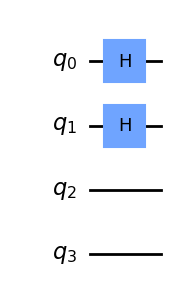

In [ ]:
qc_encodeSP=QuantumCircuit(4)
qc_encodeSP.h(0)#Hゲートの適用
qc_encodeSP.h(1)
qc_encodeSP.draw('mpl')

Hゲートを通過後、量子ビット$q_0,q_1$の状態は
$$\frac{1}{2}|00⟩+\frac{1}{2}|01⟩+\frac{1}{2}|10⟩+\frac{1}{2}|11⟩$$
に変換されます。（Hゲートが数学的にどのような演算であるかは後に解説されます。）  
これをエンコード回路としてqc_operation、qc_outputに結合しましょう。
```
qc=qc_encodeSP+qc_operation+qc_output
qc.draw('mpl')
```

<ipython-input-145-7b8e160cb65f>:1: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  qc=qc_encodeSP+qc_operation+qc_output


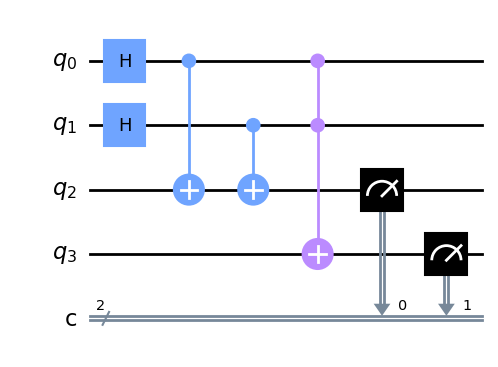

In [ ]:
qc=qc_encodeSP+qc_operation+qc_output
qc.draw('mpl')

この回路においてはどのような出力を得るでしょうか？  
シミュレーションをおこないます。
```
qobj = assemble(qc)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)
```

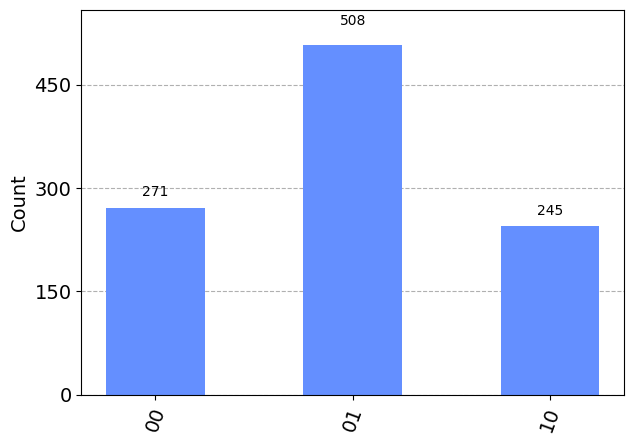

In [ ]:
qobj = assemble(qc)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

結果を見ると、0+0の計算結果00と1+1の計算結果01がそれぞれおよそ1/4の確率で抽出されていることが分かります。  
そして0+1または1+0の計算結果10がおよそ1/2の確率で抽出されています。
このことから量子回路は潜在的に、  
0+0,0+1,1+0,1+1の４つの計算を同時に実行していると言えます。  
（ただしそのうちのひとつの計算結果だけが測定されます。）


## **演習課題01**

### 問題
0+0+0, 0+0+1, 0+1+0, 1+0+0, 0+1+1, 1+0+1, 1+1+0, 1+1+1 の計算を同時におこなう量子回路を作成せよ。  
回路は5量子ビット2出力で構成するものとする。

**解答**

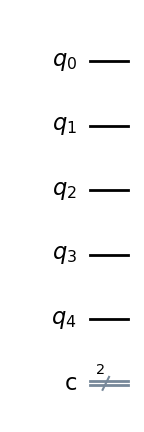

In [ ]:
n_q = 5 #量子ビット数の指定
n_b = 2 #出力ビット数の指定
qc_output = QuantumCircuit(n_q,n_b) #コードQuantumCircuitにより作成された量子回路
qc_output.draw(output='mpl')#量子回路の表示

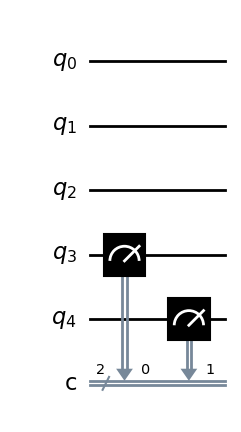

In [ ]:
qc_output.measure(3,0)
qc_output.measure(4,1)
qc_output.draw('mpl')

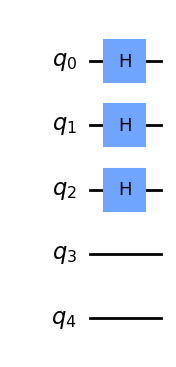

In [ ]:
qc_encodeSP=QuantumCircuit(5)

qc_encodeSP.h(0)#Hゲートの適用
qc_encodeSP.h(1)
qc_encodeSP.h(2)
qc_encodeSP.draw('mpl')



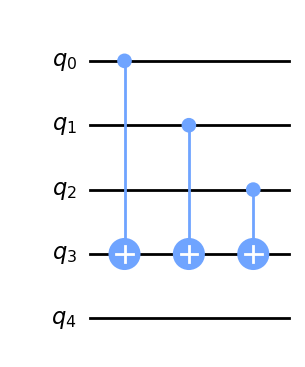

In [ ]:
qc_operation=QuantumCircuit(5)
qc_operation.draw('mpl')

qc_operation.cx(0,3)#CNOTゲートの適用
qc_operation.cx(1,3)
qc_operation.cx(2,3)
qc_operation.draw('mpl')



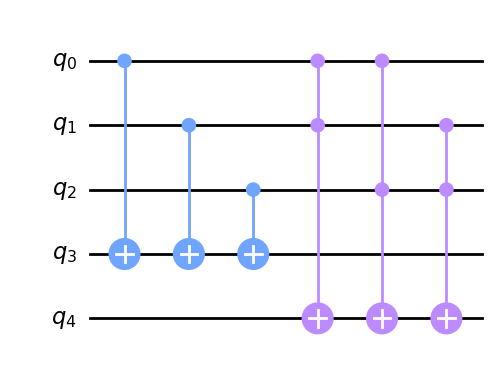

In [ ]:
qc_operation.ccx(0,1,4)#CCNOTゲートの適用
qc_operation.ccx(0,2,4)#CCNOTゲートの適用
qc_operation.ccx(1,2,4)#CCNOTゲートの適用


qc_operation.draw('mpl')

<ipython-input-155-7b8e160cb65f>:1: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  qc=qc_encodeSP+qc_operation+qc_output


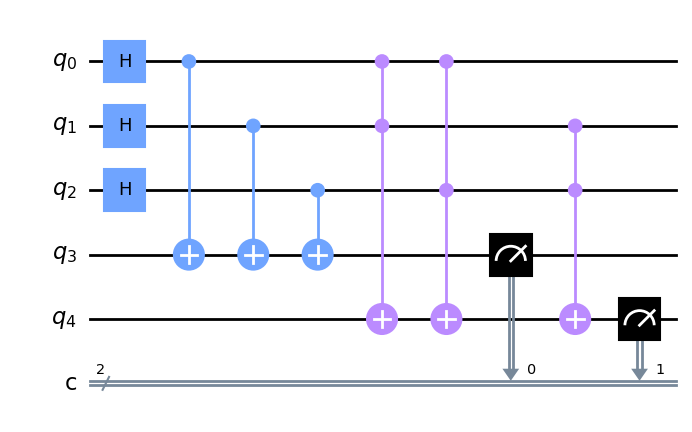

In [ ]:
qc=qc_encodeSP+qc_operation+qc_output
qc.draw('mpl')

In [ ]:
sim = Aer.get_backend('aer_simulator')
qobj = assemble(qc)
result = sim.run(qobj).result()
counts = result.get_counts()#出力の頻度データ(counts)の取り出し
print(counts)#countsの表示

{'11': 113, '01': 396, '00': 129, '10': 386}


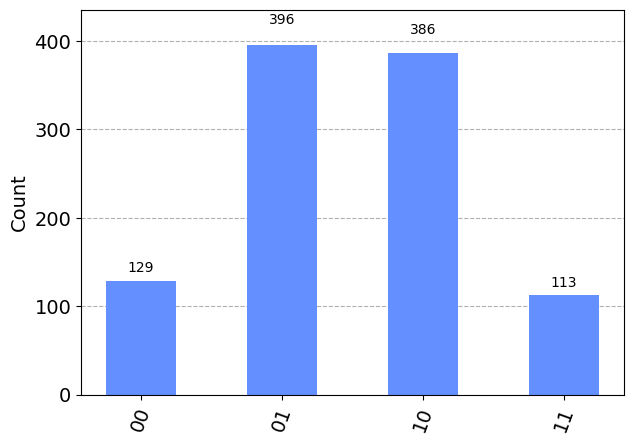

In [ ]:
plot_histogram(counts)

---
---
---


**シミュレーション**